# Chapter 3 - The Best of the Best Models


## ACF & PACF

AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:




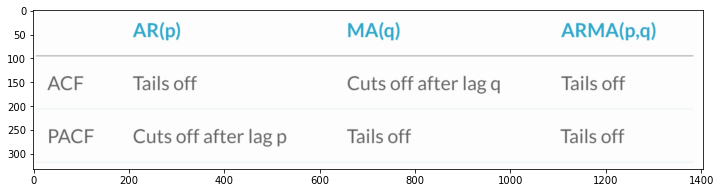

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img3 = mpimg.imread('MatricePQ.png')
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(img3)
plt.show()

A time series with unknown properties, df is available for you in your environment.

In [4]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [5]:
# Load in the time series
df = pd.read_csv('df.csv',
            parse_dates=True)


In [6]:
df.y

0      1.624345
1     -0.936625
2      0.081483
3     -0.663558
4      0.738023
         ...   
995   -0.043514
996   -1.651165
997    0.738258
998   -0.350327
999   -0.961806
Name: y, Length: 1000, dtype: float64

1. Import the plot_acf and plot_pacf functions from statsmodels.
2. Plot the ACF and the PACF for the series df for the first 10 lags but not the zeroth lag.

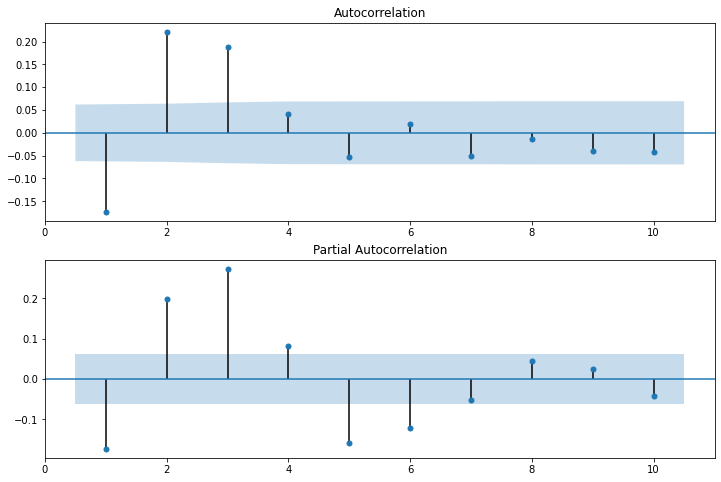

In [7]:

# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df.y, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df.y, lags=10, zero=False, ax=ax2)

plt.show()

Question 1

Based on the ACF and PACF plots, what kind of model is this?

Possible Answers
1. AR(3)
2. MA(3)
3. ARMA(3,3)

### Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

In [8]:
# Load in the time series
earthquake = pd.read_csv('earthquake.csv',
            parse_dates=True)

In [9]:
earthquake

,date,earthquakes_per_year
0,1900-01-01,13.0
1,1901-01-01,14.0
2,1902-01-01,8.0
3,1903-01-01,10.0
4,1904-01-01,16.0
...,...,...
94,1994-01-01,15.0
95,1995-01-01,25.0
96,1996-01-01,22.0
97,1997-01-01,20.0


1. Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.

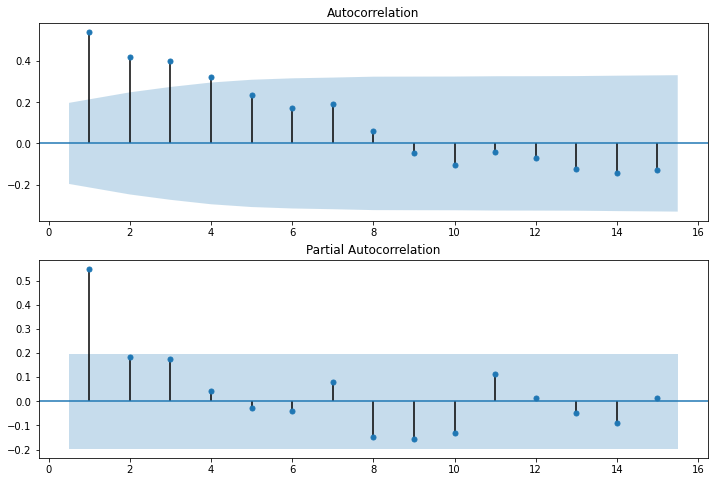

In [10]:
## Order of earthquakes

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax1)
plot_pacf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

Question 2

Look at the ACF/PACF plots and the table above.

What is the most appropriate model for the earthquake data?

Possible Answers
1. ARMA(1,4)
2. AR(4)
3. MA(1)
4. ARMA(1,1)
5. AR(1)

2. Create and train a model object for the earthquakes time series.

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Instantiate model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,0))

# Train model
results = model.fit()

# Intro to AIC and BIC


Searching over model order
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

In [12]:
## Searching over model order

# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df.y, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# We built 9 models in just a few seconds! 
# In the next exercise you will evaluate the results to choose the best model.

C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
## Choosing order with AIC and BIC

#Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.309217  2832.847994
5  1  2  2817.292469  2836.923491
2  0  2  2872.205775  2886.929041
7  2  1  2889.542357  2909.173378
6  2  0  2930.299502  2945.022768
4  1  1  2960.351123  2975.074389
3  1  0  2969.236419  2979.051929
1  0  1  2978.726928  2988.542439
0  0  0  2996.526753  3001.434508
   p  q          AIC          BIC
8  2  2  2808.309217  2832.847994
5  1  2  2817.292469  2836.923491
2  0  2  2872.205775  2886.929041
7  2  1  2889.542357  2909.173378
6  2  0  2930.299502  2945.022768
4  1  1  2960.351123  2975.074389
3  1  0  2969.236419  2979.051929
1  0  1  2978.726928  2988.542439
0  0  0  2996.526753  3001.434508


Question 3

Which of the following models is the best fit?

Possible Answers
1. ARMA(0,0)
2. ARMA(0,1)
3. ARMA(0,2)
4. ARMA(1,2)
5. ARMA(2,2)

## AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.



1. Loop over orders of p and q between 0 and 2.
2. Inside the loop try to fit an ARMA(p,q) to earthquake on each loop.
3. Print p and q alongside AIC and BIC in each loop.
4. If the model fitting procedure fails print p, q, None, None.

In [15]:
## AIC and BIC vs ACF and PACF

# Loop over p values from 0-2
for p in range(5):
    # Loop over q values from 0-2
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake['earthquakes_per_year'], order=(p, 0, q))
            results = model.fit()
            
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
            
        except:
            print(p, q, None, None)
            
#Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q', 'AIC', 'BIC'])
# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum

    p  q          AIC          BIC
14  1  1   647.132300   654.917660
31  1  1   647.132300   654.917660
15  1  2   648.738566   659.119046
32  1  2   648.738566   659.119046
18  2  1   648.842840   659.223319
36  2  1   648.842840   659.223319
19  2  2   648.850644   661.826244
37  2  2   648.850644   661.826244
21  3  0   649.748166   660.128646
40  3  0   649.748166   660.128646
16  1  3   649.986498   662.962097
33  1  3   649.986498   662.962097
41  3  1   650.009945   662.985544
22  3  1   650.009945   662.985544
45  4  0   650.228277   663.203877
44  3  4   651.389363   672.150322
38  2  3   651.902411   667.473131
20  2  3   651.902411   667.473131
34  1  4   651.941850   667.512569
24  3  3   651.950118   670.115957
43  3  3   651.950118   670.115957
46  4  1   652.004611   667.575330
42  3  2   652.004944   667.575663
23  3  2   652.004944   667.575663
48  4  3   652.752399   673.513358
49  4  4   653.679182   677.035260
39  2  4   653.986362   672.152201
47  4  2   654.00433

C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Model diagnostics

### Mean absolute error

Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake.

1. Use np functions to calculate the Mean Absolute Error (MAE) of the .resid attribute of the results object.
Print the MAE.
2. Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.

4.755625671846906


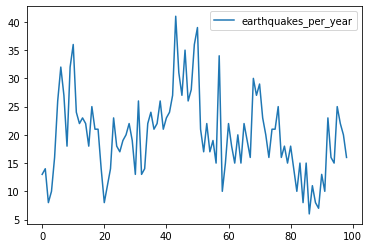

In [32]:
# Fit model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

Great! Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.

### Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

JB(PValue>0.05)= Accept Ho (Normal Distribution)

JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

Q(PValue>0.05)= Accept Ho (No correlation)

Q(PValue<0.05)= Reject Ho (correlation)


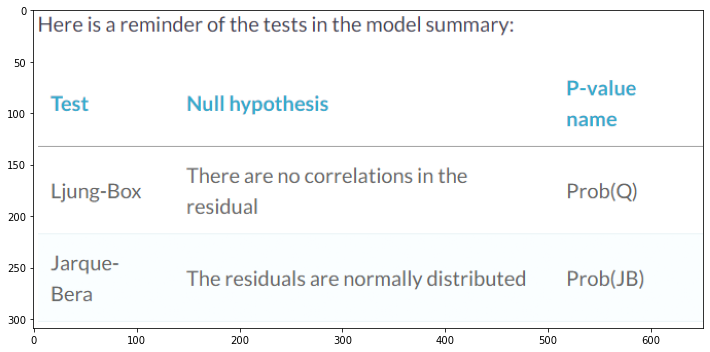

In [45]:
img4 = mpimg.imread('Ljung.png')
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(img4)
plt.show()

In [39]:
# Load in the time series
df1 = pd.read_csv('df1.csv',
            parse_dates=True)


# Create and fit model
model1 = SARIMAX(df1.y, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -407.842
Date:                Sat, 11 Apr 2020   AIC                            825.683
Time:                        22:42:35   BIC                            844.202
Sample:                             0   HQIC                           833.095
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1533      0.139      1.100      0.271      -0.120       0.427
ar.L2          0.2072      0.060      3.471      0.001       0.090       0.324
ar.L3          0.2522      0.061      4.139      0.0

Question 4

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results1?

Possible Answers

1. They are not correlated and are normally distributed.
2. They are correlated and are normally distributed.
3. They are not correlated and are not normally distributed.
4. They are correlated and are not normally distributed.
5. The outcome of tests are not conclusive.

1
Hint

We only reject the null hypothesis in each of the tests if the p-value is less than 0.05.
The null hypothesis for the relevant test are in the context section of this exercise.

In [47]:
# Create and fit model
model2 = SARIMAX(df1.y, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -422.266
Date:                Sat, 11 Apr 2020   AIC                            850.532
Time:                        22:59:27   BIC                            861.643
Sample:                             0   HQIC                           854.979
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2159      0.053     -4.045      0.000      -0.320      -0.111
ar.L2          0.0654      0.057      1.156      0.248      -0.045       0.176
sigma2         0.9773      0.076     12.831      0.0

Question 5

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results2?

Possible Answers
1. They are not correlated and are normally distributed.
2. They are correlated and are normally distributed.
3. They are not correlated and are not normally distributed.
4. They are correlated and are not normally distributed.
5. The outcome of tests are not conclusive.

2

### Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

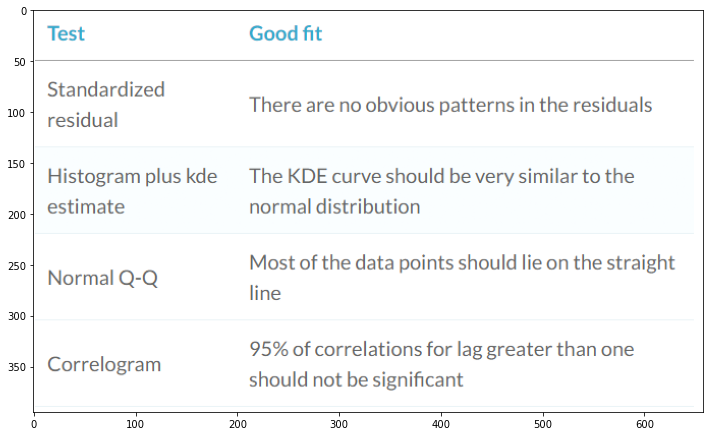

In [48]:
img5 = mpimg.imread('plot_diagnostic.png')
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(img5)
plt.show()

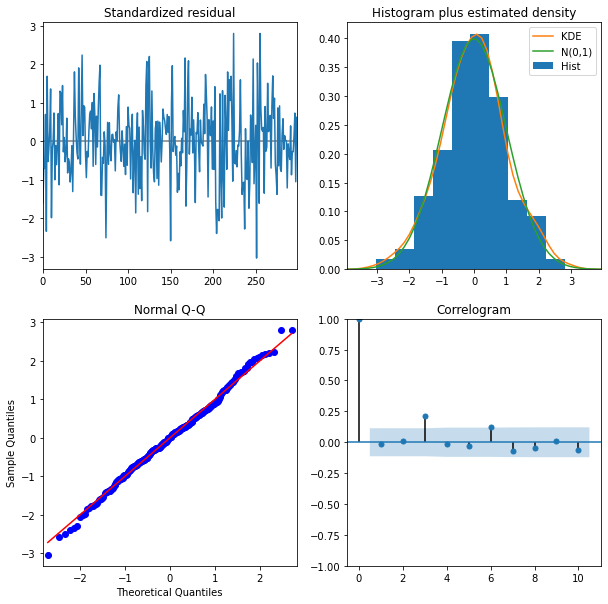

In [54]:
# Create and fit model
model = SARIMAX(df1.y, order=(1,1,1))
results = model.fit()

# Create the 4 diagostics plots

results.plot_diagnostics(figsize=(10,10))
plt.show()

Question 6

Do these plots suggest that any of these are true about the model fit.

Possible Answers

1. The residuals are not normally distributed. You should try increasing d.
2. The residuals are correlated. You should increase p or q.
3. None of the above.

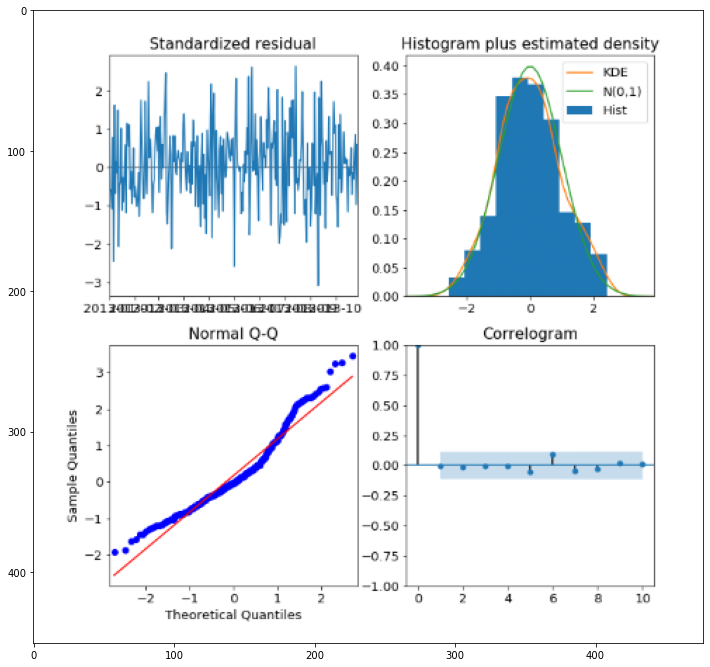

In [55]:
img5 = mpimg.imread('4plots.png')
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(img5)
plt.show()

Question 7

Below are 4 different diagnostic plots, each of the 4 plots comes from a different fitted model.

Which of the plots above suggest that the fitted model could be improved?

1. Possible Answers
2. Standardized residuals.
3. Histogram plus estimated density.
4. Normal Q-Q.
5. Correlogram.
6. None.